## Boston Housing - Regression Problem
### To predict house price using dataset from Kaggle

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [1]:
FOLDERNAME = "PUC_Rio/ML/Boston_Housing"
%cd drive/MyDrive/$FOLDERNAME

/content/drive/MyDrive/PUC_Rio/ML/Boston_Housing


In [ ]:
%ls

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


### Loading dataset which had been downloded at github from kaggle
This dataset is seperated into train dataset and test dataset, you only can get test data score when hou upload your prediction into kaggle

In [4]:
# url_train = './train.csv'
# url_test = './test.csv'
url_train = 'https://raw.githubusercontent.com/leticia-chen/MVP/main/Boston_Housing/train.csv'
url_test = 'https://github.com/leticia-chen/MVP/blob/main/Boston_Housing/test.csv?raw=True'


In [5]:
df_t = pd.read_csv(url_train)
df_t.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
df_t.shape

(333, 15)

In [7]:
# Removing the ID column from dataset
feature_names = df_t.columns[1:]
print(feature_names)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [8]:
train_data = df_t[feature_names]
train_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


After feature selection analysis, removing cloumn 'chas' which is least important to compare the results with all features

In [9]:
new_train = train_data.drop('chas', axis=1)
new_train.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [10]:
features_no_chas = new_train.columns
print(features_no_chas)

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [11]:
train_data.shape

(333, 14)

In [12]:
new_train.shape

(333, 13)

To check if there are missing data

In [13]:
print(train_data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


Test dataset is for competition in Kaggle

In [14]:
# Dataset without true label
df_test = pd.read_csv(url_test)
df_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [15]:
df_test.shape

(173, 14)

In [16]:
# Removing the column 'ID'
test_feature = df_test.columns[1:]
test_data = df_test[test_feature]
test_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [17]:
# Removing the column 'Chas'
new_test = test_data.drop('chas', axis=1)
new_test.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [18]:
test_data.shape, new_test.shape

((173, 13), (173, 12))

In [19]:
test_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

## Features analysis - to know each feature's performance in this dataset

In [20]:
# feature selection
def select_features(x_train, y_train, x_val):
  # configure to select all features
  fs = SelectKBest(score_func=mutual_info_regression, k='all')

  # learn relationship from training data
  fs.fit(x_train, y_train)

  # transform train input data
  x_train_fs = fs.transform(x_train)

  # transform test input data
  x_val_fs = fs.transform(x_val)

  return x_train_fs, x_val_fs, fs

### Split train_dataset into train data and validation data
From this processo we noticed the 'Chas' is the least important, and base on this analysis we will create a dataset without 'Chas' to compare the performance of dataset with all features

In [21]:
train_data.shape, new_train.shape

((333, 14), (333, 13))

In [22]:
datas = [(train_data, feature_names), (new_train, features_no_chas)]

(333, 13) (333,)
(266, 13) (266,) (67, 13) (67,)
-------------------------------
The evaluation of importance of all features:
Feature 0 (crim): 0.246413
Feature 1 (zn): 0.163078
Feature 2 (indus): 0.459751
Feature 3 (chas): 0.011452
Feature 4 (nox): 0.367733
Feature 5 (rm): 0.485434
Feature 6 (age): 0.328624
Feature 7 (dis): 0.270237
Feature 8 (rad): 0.204742
Feature 9 (tax): 0.326084
Feature 10 (ptratio): 0.438096
Feature 11 (black): 0.129439
Feature 12 (lstat): 0.678822


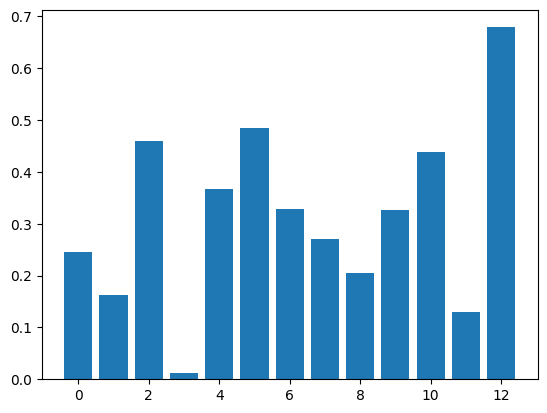

(333, 12) (333,)
(266, 12) (266,) (67, 12) (67,)
-------------------------------
The evaluation of importance of features without chas:
Feature 0 (crim): 0.243966
Feature 1 (zn): 0.167268
Feature 2 (indus): 0.462751
Feature 3 (nox): 0.371542
Feature 4 (rm): 0.487128
Feature 5 (age): 0.326729
Feature 6 (dis): 0.267881
Feature 7 (rad): 0.213699
Feature 8 (tax): 0.326698
Feature 9 (ptratio): 0.431898
Feature 10 (black): 0.128189
Feature 11 (lstat): 0.674439


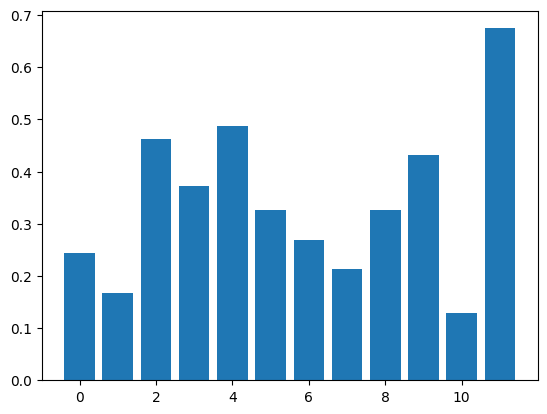

In [23]:
test_size = 0.2
seed = 7
for data in datas:
  array = data[0].values
  x = array[:, 0:data[0].shape[1]-1]
  y = array[:, data[0].shape[1]-1]
  print(x.shape, y.shape)

  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=seed)
  print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

  # feature selection
  x_train_fs, x_val_fs, fs = select_features(x_train, y_train, x_val)

# what are scores for the features
  print('-------------------------------')
  if np.array_equal(data[1], feature_names):
      print('\033[1mThe evaluation of importance of all features:\033[0m')
  else:
      print('\033[1mThe evaluation of importance of features without chas:\033[0m')
  for i in range(len(fs.scores_)):
    print('Feature %d (%s): %f' % (i, data[1][i], fs.scores_[i]))

# plot the scores
  plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
  plt.show()

## Using Cross validation to evaluate the performance of models

In [24]:
AdaBoostRegressor,
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=7)

# Global seed
np.random.seed(7)

models = []
# results = []
# names = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('D-Tree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('XGB', XGBRegressor()))

# Defining parameters of base classifier for the BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 4

# Creating models for VotingRegressor
bases = []
model1 = LinearRegression()
bases.append(('linear', model1))
model2 = DecisionTreeRegressor()
bases.append(('d-tree', model2))
model3 = SVR()
bases.append(('svm', model3))

# Creating emsembles and add into models list
models.append(('Bagging', BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(('R-Forest', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GB', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

In [25]:
print(models)

[('LR', LinearRegression()), ('Ridge', Ridge()), ('Lasso', Lasso()), ('KNN', KNeighborsRegressor()), ('D-Tree', DecisionTreeRegressor()), ('SVM', SVR()), ('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)), ('Bagging', BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)), ('R-Fo

### Here will show how the performance of models from two diferente datasets: with all feature, without 'Chas'

The MSE/RMSE while datas with all features:

LR: MSE 25.87 (12.90) - RMSE 5.09
Ridge: MSE 25.26 (14.16) - RMSE 5.03
Lasso: MSE 64.42 (32.13) - RMSE 8.03
KNN: MSE 32.57 (18.75) - RMSE 5.71
D-Tree: MSE 25.36 (10.66) - RMSE 5.04
SVM: MSE 41.89 (30.20) - RMSE 6.47
XGB: MSE 12.55 (6.34) - RMSE 3.54
Bagging: MSE 11.84 (6.42) - RMSE 3.44
R-Forest: MSE 12.17 (7.73) - RMSE 3.49
Ada: MSE 14.94 (7.46) - RMSE 3.87
GB: MSE 9.73 (3.97) - RMSE 3.12
Voting: MSE 19.45 (12.45) - RMSE 4.41


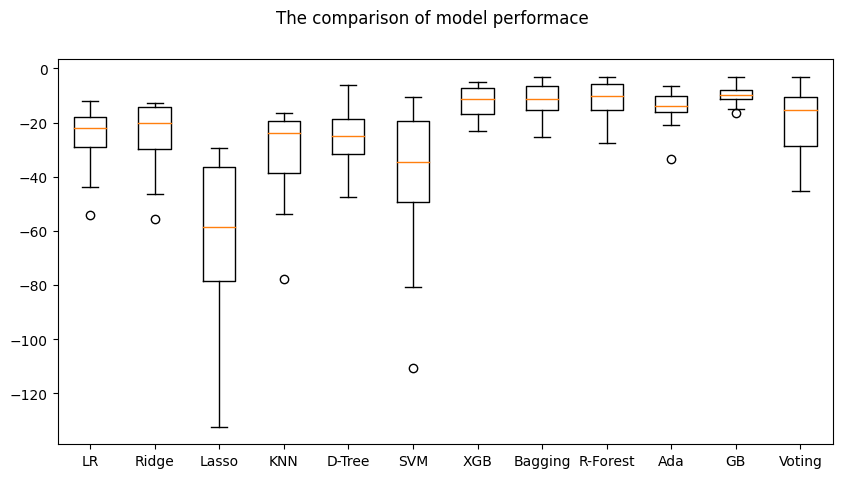

----------------------------------------------------------------------------------------------------
The MSE/RMSE while datas with features without chat:

LR: MSE 26.69 (13.24) - RMSE 5.17
Ridge: MSE 26.06 (14.76) - RMSE 5.10
Lasso: MSE 64.42 (32.13) - RMSE 8.03
KNN: MSE 25.50 (12.34) - RMSE 5.05
D-Tree: MSE 25.52 (11.06) - RMSE 5.05
SVM: MSE 41.03 (29.96) - RMSE 6.41
XGB: MSE 11.94 (6.26) - RMSE 3.46
Bagging: MSE 10.75 (5.30) - RMSE 3.28
R-Forest: MSE 11.40 (6.47) - RMSE 3.38
Ada: MSE 15.93 (9.46) - RMSE 3.99
GB: MSE 9.70 (4.33) - RMSE 3.11
Voting: MSE 19.86 (12.74) - RMSE 4.46


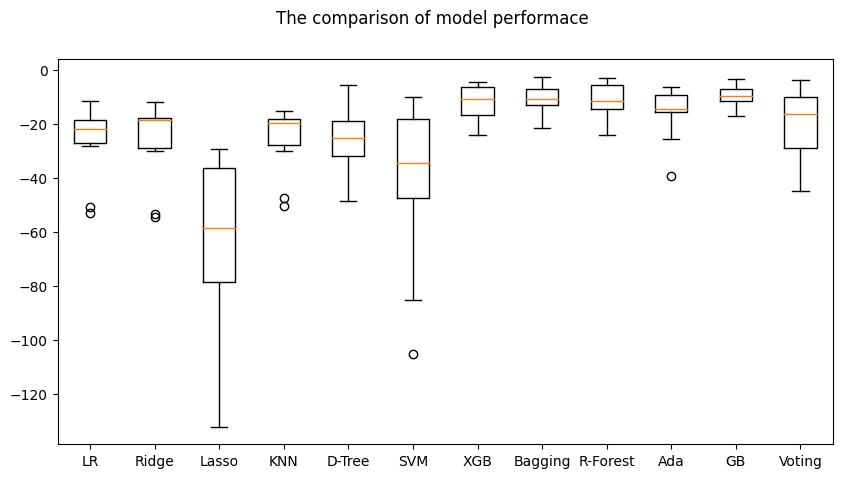

----------------------------------------------------------------------------------------------------


In [26]:
datas = [train_data, new_train]

test_size = 0.2
seed = 7
train_results = []    # To collect the result of train_data
train_names = []      # To collect names of models form train_data
new_results = []      # To collect the result of new_train
new_names = []        # To collect names of models from new_train

for data in datas:
  array = data.values
  x = array[:, 0:data.shape[1]-1]
  y = array[:, data.shape[1]-1]

  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=seed)

  # Normalization
  normalizer = MinMaxScaler()
  x_train_nor = normalizer.fit_transform(x_train)

  # dataset with all feature
  if np.array_equal(data, train_data):
      print('\033[91mThe MSE/RMSE while datas with all features:\033[0m\n')
      results = train_results
      names = train_names
  # dataset withou 'Chas'
  else:
      print('\033[91mThe MSE/RMSE while datas with features without chat:\033[0m\n')
      results = new_results
      names = new_names

  for name, model in models:
    cv_results = cross_val_score(model, x_train_nor, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = '%s: MSE %0.2f (%0.2f) - RMSE %0.2f' % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)

  fig = plt.figure(figsize=(10, 5))
  fig.suptitle('The comparison of model performace')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()
  print('-'*100)

Base on Evaluation of performance of models by using Cross validation, we selected models with better performance as like XGB, Bagging, R-Forest, and also keep SVM model to next step because SVM's structure is diferente from models selected.

## Traning selected models

### Setting pipeline

In [27]:
np.random.seed(7)

pipelines = []
pipelines.append(('SVM', Pipeline(steps=[('normalization', MinMaxScaler()), ('svm', SVR(kernel='rbf'))])))
pipelines.append(('XGB', Pipeline(steps=[('normalization', MinMaxScaler()), ('xgb', XGBRegressor())])))
pipelines.append(('Bagging', Pipeline(steps=[('normalization', MinMaxScaler()), ('bagging', BaggingRegressor(base_estimator=base))])))
pipelines.append(('Forest', Pipeline(steps=[('normalization', MinMaxScaler()), ('forest', RandomForestRegressor())])))

In [34]:
# print(pipelines)

### Using Grid Search to perform hyperparameter optimization

In [28]:
# Setting parameters
params = []
params.append(('SVM', {'svm__C': [240, 250, 260, 270, 280, 290, 300, 310], 'svm__epsilon': [1.0, 1.1, 1.2], 'svm__gamma': [0.8, 0.9, 1.0]}))
params.append(('XGB', {'xgb__n_estimators': [4000, 5000, 7000], 'xgb__max_depth': [2,3,4], 'xgb__learning_rate': [0.009, 0.01, 0.02]}))
params.append(('Bagging', {
    'bagging__n_estimators': [50, 100, 150],
    'bagging__max_samples': [0.8, 0.9, 1.0],
    'bagging__max_features': [0.9, 1.0, 1.1]}))
params.append(('Forest', {
    'forest__n_estimators': [30, 40, 50, 60],
    'forest__max_depth': range(3, 5),
    'forest__min_samples_leaf': range(2, 3),
    'forest__max_leaf_nodes': range(9, 13)}))

In [29]:
# To get parameters according to model
def params_grid(name):
  for title, param in params:
    if title == name:
      return param

In [30]:
# Saving predictions of test datas into cvs file on device for Kaggle competion
import datetime

def out_file(predictions, filename):
	data = pd.read_csv(url_test)
	id = data.ID

	# print('\n=============================================')
	print(f'Writing test predictions to --> {filename}')
	with open(filename, 'w') as out:
		out.write('ID,medv\n')
		for i in range(len(id)):
			out.write(str(id[i])+','+str(predictions[i])+'\n')
	print('================================================')

### This function is to build the GridSearchCV model to get the best parameters of each model selected
Here is also divided into all features and feature withou 'Chas'

In [31]:
from sklearn.model_selection import GridSearchCV

best_model_train_data = []
best_model_new_train = []

def grid_search(pipelines, x_train_nor, y_train, is_all_features):
    for name, model in pipelines:
        grid = GridSearchCV(estimator=model, param_grid=params_grid(name), scoring='neg_mean_squared_error', cv=kfold)
        grid.fit(x_train_nor, y_train)

        print('%s - better: %f using %s' % (name, grid.best_score_, grid.best_params_))

        if is_all_features:
          # With all features
          best_model_train_data.append(grid.best_estimator_)
        else:
          # Without 'Chas'
          best_model_new_train.append(grid.best_estimator_)

### This function is for prediction using validation data and to get the prediction of test data which will be upload to Kaggle competition to get the result

In [32]:
def predict_and_plot(best_model, x_val, y_val, test_data, is_all_features):
    for i, estimator in enumerate(best_model):
        model_name = type(list(estimator.named_steps.values())[1]).__name__

        predictions = estimator.predict(x_val)
        validation_error = mean_squared_error(y_val, predictions)
        print(f"{model_name}_RMS - Validation Error: {validation_error}")

        prediction_test = np.around(estimator.predict(test_data), decimals=13)

        # To get the current date and month
        now = datetime.datetime.now()
        date_month = now.strftime("%d%m")

        if is_all_features:
          # all features
          output_file = f'{model_name}_{date_month}_all_features.csv'
        else:
          # without 'Chas'
          output_file = f'{model_name}_{date_month}_no_chas.csv'

        # Saving the predictions of test_data in device
        out_file(prediction_test, output_file)

        # y_val
        plt.subplot(len(best_model), 1, i+1)
        plt.bar(range(len(y_val)), y_val, label='y_val')

        # predictions(red)
        plt.plot(range(len(predictions)), predictions, color='red', label='predictions')

        # plt.legend(fontsize='small')

        plt.title(f"{model_name}", fontsize='medium')

        plt.subplots_adjust(hspace=1.0)

    plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

    # space between subplots
    plt.tight_layout()

    plt.show()

### Training models in deferentes datasets: with all features / features without 'Chas'

Getting selected model better parameters performance while datas with all features:

SVM - better: -11.497555 using {'svm__C': 280, 'svm__epsilon': 1.2, 'svm__gamma': 0.8}
XGB - better: -10.335709 using {'xgb__learning_rate': 0.009, 'xgb__max_depth': 2, 'xgb__n_estimators': 4000}
Bagging - better: -11.004972 using {'bagging__max_features': 0.9, 'bagging__max_samples': 0.9, 'bagging__n_estimators': 50}
Forest - better: -14.048675 using {'forest__max_depth': 4, 'forest__max_leaf_nodes': 12, 'forest__min_samples_leaf': 2, 'forest__n_estimators': 60}

Validation Error while dataset with all features:

SVR_RMS - Validation Error: 14.565079188364285
Writing test predictions to --> SVR_0307_all_features.csv
XGBRegressor_RMS - Validation Error: 14.020015358600666
Writing test predictions to --> XGBRegressor_0307_all_features.csv
BaggingRegressor_RMS - Validation Error: 13.28254764179106
Writing test predictions to --> BaggingRegressor_0307_all_features.csv
RandomForestRegressor_RMS - Validatio

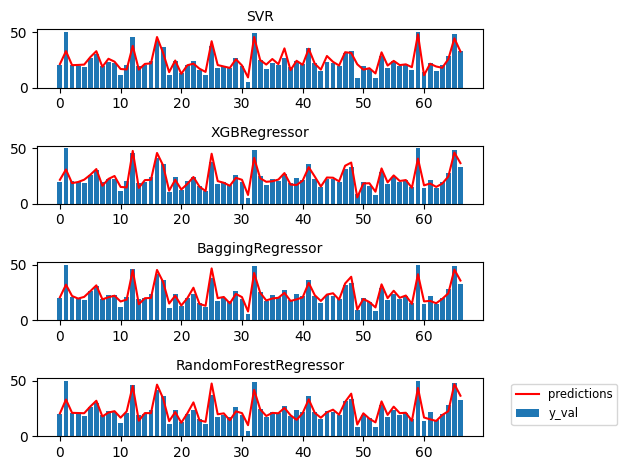

--------------------------------------------------
Getting selected model better parameters performance while datas with features without chat:

SVM - better: -10.247636 using {'svm__C': 260, 'svm__epsilon': 1.2, 'svm__gamma': 1.0}
XGB - better: -10.525979 using {'xgb__learning_rate': 0.009, 'xgb__max_depth': 3, 'xgb__n_estimators': 4000}
Bagging - better: -10.428904 using {'bagging__max_features': 0.9, 'bagging__max_samples': 0.9, 'bagging__n_estimators': 50}
Forest - better: -14.509197 using {'forest__max_depth': 4, 'forest__max_leaf_nodes': 11, 'forest__min_samples_leaf': 2, 'forest__n_estimators': 30}

Validation Error while dataset without chas:

SVR_RMS - Validation Error: 10.71649198821415
Writing test predictions to --> SVR_0307_no_chas.csv
XGBRegressor_RMS - Validation Error: 16.656345095190108
Writing test predictions to --> XGBRegressor_0307_no_chas.csv
BaggingRegressor_RMS - Validation Error: 12.974635343283587
Writing test predictions to --> BaggingRegressor_0307_no_chas.c

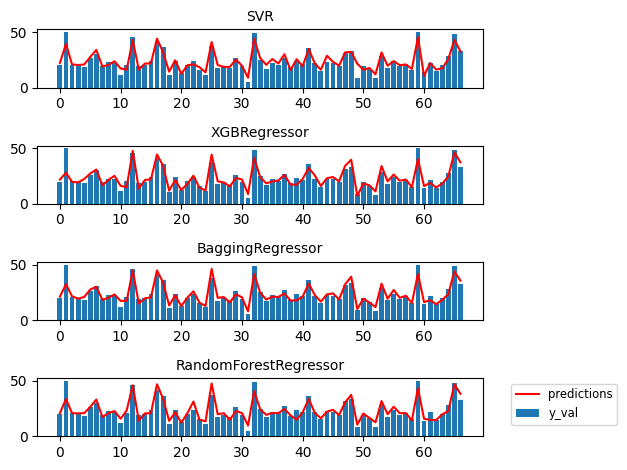

In [33]:
# Normalization
normalizer = MinMaxScaler()
datasets = [train_data, new_train]

for data in datasets:
    array = data.values
    x = array[:, 0:data.shape[1]-1]
    y = array[:, data.shape[1]-1]

    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=7)

    x_train_nor = normalizer.fit_transform(x_train)
    x_val_nor = normalizer.transform(x_val)

    if np.array_equal(data, train_data):

      is_all_features = True

      print('\033[91mGetting selected model better parameters performance while datas with all features:\033[0m\n')
      grid_search(pipelines, x_train_nor, y_train, is_all_features)

      print()
      print('\033[91mValidation Error while dataset with all features:\033[0m\n')
      test_data = test_data.values
      test_data_nor = normalizer.transform(test_data)
      predict_and_plot(best_model_train_data, x_val_nor, y_val, test_data_nor, is_all_features)
      print('-'*50)

    else:
      is_all_features = False

      print('\033[91mGetting selected model better parameters performance while datas with features without chas:\033[0m\n')
      grid_search(pipelines, x_train_nor, y_train, is_all_features)

      print()
      print('\033[91mValidation Error while dataset without chas:\033[0m\n')
      new_test = new_test.values
      new_test_nor = normalizer.transform(new_test)
      predict_and_plot(best_model_new_train, x_val_nor, y_val, new_test_nor, is_all_features)


## The performance of best model which dropout the 'chas' feature on Kaggle compatition
* SVM - 'svm__C': 260, 'svm__epsilon': 1.2, 'svm__gamma': 1.0
* XGB - 'xgb__learning_rate': 0.009, 'xgb__max_depth': 3, 'xgb__n_estimators': 4000
* Bagging - 'bagging__max_features': 0.9, 'bagging__max_samples': 0.9, 'bagging__n_estimators': 50
* Forest - 'forest__max_depth': 4, 'forest__max_leaf_nodes': 11, 'forest__min_samples_leaf': 2, 'forest__n_estimators': 30

[Boston Housing](https://www.kaggle.com/competitions/boston-housing/submissions)
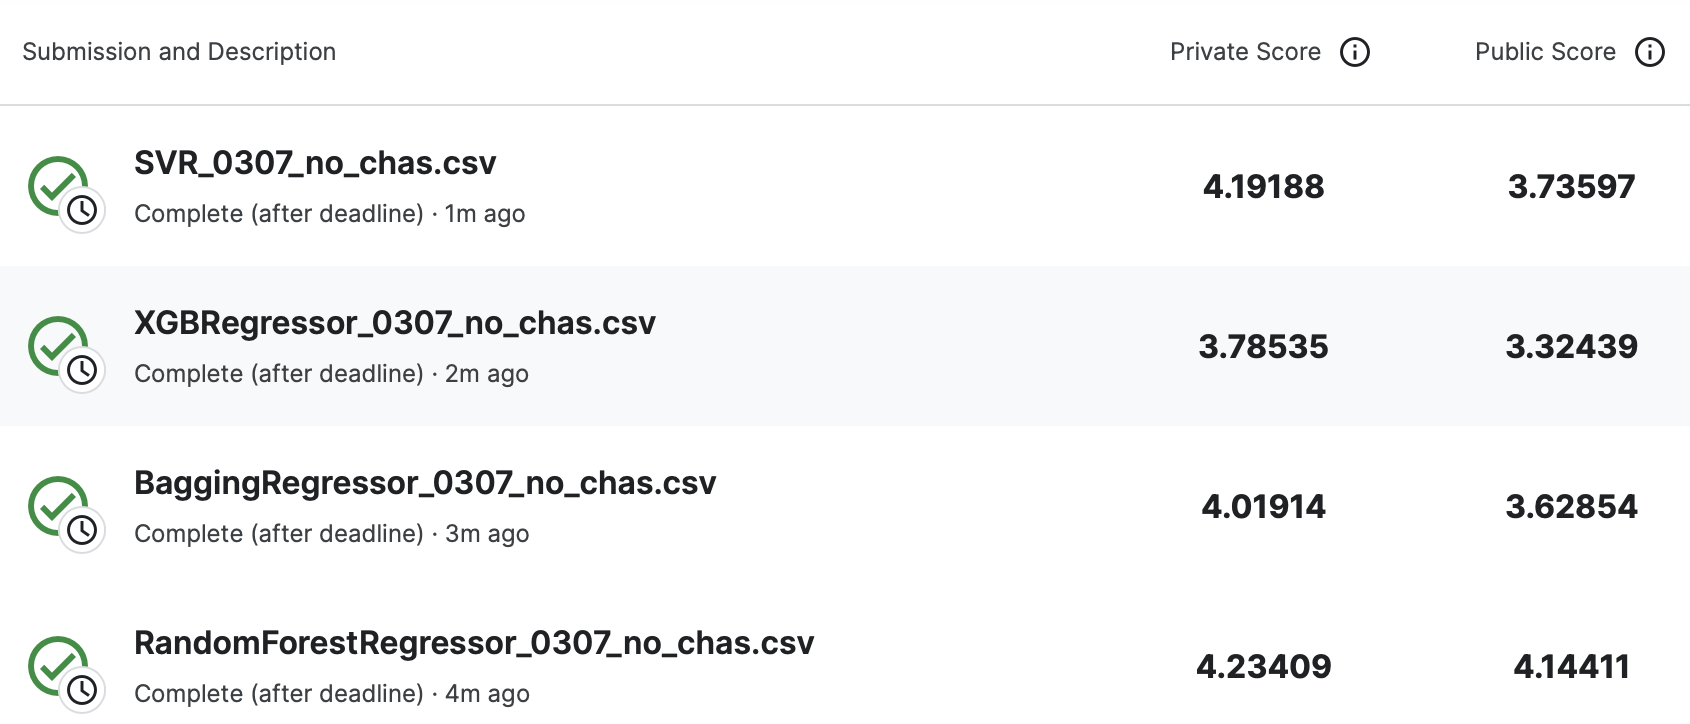

## The performance of best model with all features on Kaggle compatition
* SVM - 'svm__C': 280, 'svm__epsilon': 1.2, 'svm__gamma': 0.8
* XGB - 'xgb__learning_rate': 0.009, 'xgb__max_depth': 2, 'xgb__n_estimators': 4000
* Bagging - 'bagging__max_features': 0.9, 'bagging__max_samples': 0.9, 'bagging__n_estimators': 50
* Forest - 'forest__max_depth': 4, 'forest__max_leaf_nodes': 12, 'forest__min_samples_leaf': 2, 'forest__n_estimators': 60

[Boston Housing](https://www.kaggle.com/competitions/boston-housing/submissions)
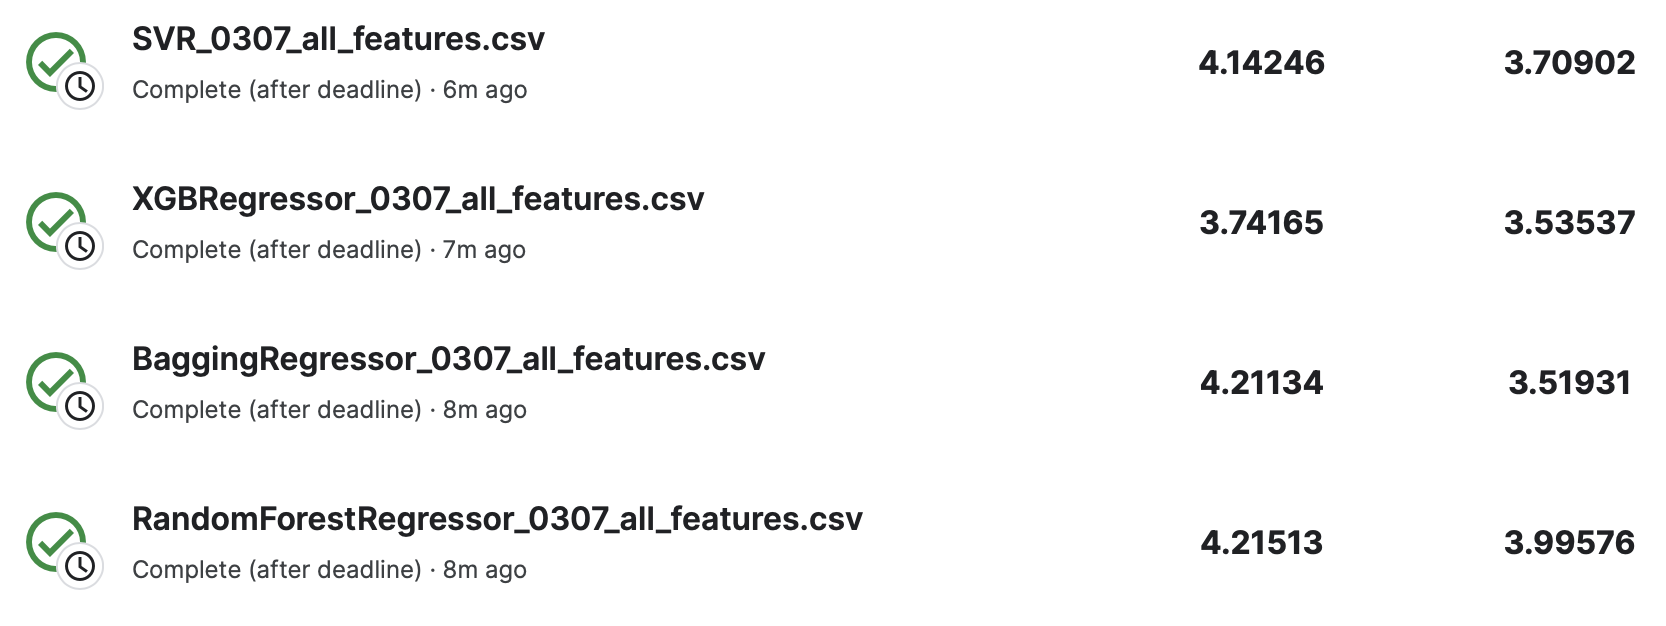

### We notice the general performance of all features is better than feature withou "Chas" even the best performance is XGBRegressor no 'Chas'. This can be beacause the number of datasets is small, therefore every feature is important for its performance.

Ps: we did not keep ajusting their parameters to find the best result on Kaggle competition